**Autor: Jose Ricardo Mendoza Villar**  
*371021 Proyecto Aplicado II*  
Práctica 1.2. Manipulación de datos

---
# Practica 1.1. Manipulación de datos

## Objetivo

En esta práctica, aprenderás a aplicar técnicas de análisis de datos utilizando Pandas para explorar un dataset relacionado con la salud mental. El objetivo es que pongas en práctica tus habilidades de manipulación, limpieza y análisis de datos para obtener conclusiones interesantes.

---

## Paso 1: Carga del Dataset

Primero, vas a cargar el archivo CSV que contiene la información sobre diferentes factores que influyen en la salud mental. Utiliza la biblioteca Pandas para leer el archivo y observa las primeras filas del dataset. Esto te ayudará a familiarizarte con la información que vas a analizar.

In [1]:
import pandas as pd

In [2]:
df_factores_salud_mental = pd.read_csv("dataset/mental_health.csv")

In [3]:
df_factores_salud_mental.head()

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,NaN,1,1,Frequent,8,9,5,7,7


1. ¿Cuántos registros y columnas tiene el dataset?

In [4]:
filas, columnas = df_factores_salud_mental.shape
print(f"Número de filas: {filas}")
print(f"Número de columnas: {columnas}")

Número de filas: 1200
Número de columnas: 21


2. ¿Qué tipo de datos predominan?

In [5]:
df_factores_salud_mental.dtypes.value_counts()

int64      14
object      5
float64     2
Name: count, dtype: int64

---

## Paso 2: Exploración Inicial

Ahora que ya tienes los datos cargados, es momento de explorar un poco más. Consulta información general como el tipo de datos en cada columna, cuántos datos no nulos hay, y revisa las primeras filas. También obtén estadísticas básicas como la media y el rango de los datos. Esto te ayudará a detectar si algo llama la atención o si hay datos fuera de lo normal.

1. ¿Existen columnas que podrían ser categóricas pero aparecen como tipo `object`?

In [6]:
df_factores_sm_text = df_factores_salud_mental.select_dtypes(include=['object'])

In [7]:
for col in df_factores_sm_text.columns:
    print(f'Valores únicos en {col}: {str(df_factores_sm_text[col].unique()).replace(" ", ", ")}')

Valores únicos en Gender: ['Male', 'Female', 'Non-Binary', 'Other']
Valores únicos en Education_Level: ["Bachelor's", "Master's", 'High, School', 'Other', 'PhD']
Valores únicos en Employment_Status: ['Unemployed', 'Retired', 'Employed', 'Student']
Valores únicos en Medication_Use: [nan, 'Occasional', 'Regular']
Valores únicos en Substance_Use: [nan, 'Frequent', 'Occasional']


2. ¿Hay valores que parecen inconsistentes o fuera de rango?

In [8]:
df_factores_salud_mental.isnull().sum()

Age                                0
Gender                             0
Education_Level                    0
Employment_Status                  0
Sleep_Hours                        0
Physical_Activity_Hrs              0
Social_Support_Score               0
Anxiety_Score                      0
Depression_Score                   0
Stress_Level                       0
Family_History_Mental_Illness      0
Chronic_Illnesses                  0
Medication_Use                   747
Therapy                            0
Meditation                         0
Substance_Use                    834
Financial_Stress                   0
Work_Stress                        0
Self_Esteem_Score                  0
Life_Satisfaction_Score            0
Loneliness_Score                   0
dtype: int64

---

## Paso 3: Limpieza de Datos

Es hora de "limpiar" los datos. Revisa si hay valores nulos o datos duplicados. Decide qué hacer con ellos: ¿los eliminarás, los reemplazarás o aplicarás otra estrategia? También asegúrate de que los tipos de datos de cada columna son correctos y convierte aquellos que no estén en el formato adecuado.

1. ¿Qué porcentaje del dataset contiene valores nulos?

In [9]:
for col in df_factores_salud_mental.columns:
    if (cantidad_nulos := df_factores_salud_mental[col].isnull().sum()) > 0:
        print(f"{col}: {round(cantidad_nulos / df_factores_salud_mental.shape[0] * 100, 2)}% nulos")

Medication_Use: 62.25% nulos
Substance_Use: 69.5% nulos


In [10]:
total_reg_nulos = round(df_factores_salud_mental.isnull().any(axis=1).sum() / df_factores_salud_mental.shape[0] * 100, 2)
print(f"El dataset tiene en total: {total_reg_nulos}% registros con al menos una columna con presencia de nulos")

El dataset tiene en total: 88.33% registros con al menos una columna con presencia de nulos


2. ¿Qué estrategia decidiste aplicar para tratar los valores nulos y por qué?

En este caso, se encontró la presencia de valores nulos en 88.33% del dataset, especificamente en dos variables categóricas (Medication_Use y Substance_Use), si se optara por una estrategia de eliminar registros, esto dejaria un conjunto de datos muy pequeño y poco útil para el entrenamiento de un modelo, particularmente, estoy tomando los nulos como un categoria adicional, pensando que la falta de información también es información, para corregir el problema basta con hacer una conversión de string a category para manipular los valores dentro de la categoria.

In [11]:
for col in df_factores_sm_text.columns:
    df_factores_salud_mental[col] = df_factores_salud_mental[col].astype('category')

In [12]:
df_factores_salud_mental.head(5)

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,NaN,1,1,Frequent,8,9,5,7,7


---

## Paso 4: Análisis Estadístico

En este paso, vas a calcular algunas estadísticas básicas para tres columnas importantes: `Anxiety_Score`, `Depression_Score` y `Stress_Level`. Queremos saber cuál es la media, la mediana y la desviación estándar de estos valores. Esto te permitirá tener una idea general sobre cómo están distribuidos estos puntajes.

In [13]:
df_factores_salud_mental[
    ["Anxiety_Score", "Depression_Score", "Stress_Level"]
].agg(
    ["mean", "median", "std"]
)

,Anxiety_Score,Depression_Score,Stress_Level
mean,10.470000,10.674167,5.000833
median,10.500000,11.000000,5.000000
std,5.911138,5.632889,2.538281


1. ¿Cuál de los tres puntajes tiene mayor variabilidad?  
La variable Anxiety_Score es la que cuenta con más variabilidad, tiene la desviación estandár más alta

2. ¿Qué observas sobre la diferencia entre media y mediana en cada caso? ¿Qué te dice esto sobre la distribución?  
Para el caso de Anxiety_Score, Stress_Level se aprecian métricas muy cercanas entre si, lo que nos indicaria una distribución simétrica,  
Para el caso de Depression_Score se puede notar una mediana > media lo que indicadira una asimetría a la izquierda.

---

## Paso 5: Filtrado de Datos

Aquí vas a enfocarte en subconjuntos específicos del dataset. Primero, identifica a las personas que tienen un puntaje alto en ansiedad (puedes elegir un valor alto, como por encima de 80). Luego, clasifica a las personas según las horas de sueño que reportan (menos de 5 horas, entre 5 y 7 horas, y más de 7 horas) y analiza cómo varía el nivel de estrés en cada grupo.

In [14]:
df_fact_sm_high_ansiety = df_factores_salud_mental[df_factores_salud_mental["Anxiety_Score"] >= df_factores_salud_mental["Anxiety_Score"].quantile(0.8)]
df_fact_sm_high_ansiety.loc[:, "Sleep_Groups"] = pd.cut(df_fact_sm_high_ansiety["Sleep_Hours"], [0, 5 , 7, float("inf")], labels=["0-5", "5-7", "7+"])

/tmp/ipykernel_16435/788615312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fact_sm_high_ansiety.loc[:, "Sleep_Groups"] = pd.cut(df_fact_sm_high_ansiety["Sleep_Hours"], [0, 5 , 7, float("inf")], labels=["0-5", "5-7", "7+"])


In [15]:
df_fact_sm_high_ansiety[
    ["Sleep_Groups", "Stress_Level"]
].groupby(
    "Sleep_Groups"
).agg(
    ["mean", "median", "std", "size"]
)

Stress_Level                      
                     mean median       std size
Sleep_Groups                                   
0-5              5.976744    6.0  2.473559   43
5-7              4.672414    5.0  2.462858  116
7+               5.365591    6.0  2.408251   93

1. ¿Qué porcentaje del total presenta niveles altos de ansiedad?

In [16]:
print(f'{df_fact_sm_high_ansiety.shape[0] / df_factores_salud_mental.shape[0]}% de la muestra con niveles altos de ansiedad (> {df_factores_salud_mental["Anxiety_Score"].quantile(0.8)})')

0.21% de la muestra con niveles altos de ansiedad (> 17.0)


2. ¿Existe una relación visible entre las horas de sueño y el nivel de estrés?

In [17]:
def pruebaDiferenciaMedias(grupo1, grupo2):
    import scipy.stats as stats


    t_stat, p_value = stats.ttest_ind(
        grupo1,
        grupo2,
        equal_var=False
    ) 

    print(f"Estadístico t: {t_stat:.4f}")
    print(f"Valor p: {p_value:.4f}")

    alpha = 0.05
    if p_value < alpha:
        print("Rechazamos la hipótesis nula: Hay una diferencia significativa de medias.")
    else:
        print("No se puede rechazar la hipótesis nula: No hay evidencia suficiente de diferencia de medias.")

In [18]:
print("-"*50)
print("Diferencia grupo 0-5 vs 5-7")
pruebaDiferenciaMedias(
    df_fact_sm_high_ansiety[df_fact_sm_high_ansiety["Sleep_Groups"] == "0-5"]["Stress_Level"],
    df_fact_sm_high_ansiety[df_fact_sm_high_ansiety["Sleep_Groups"] == "5-7"]["Stress_Level"]
)

print("-"*50)
print("Diferencia grupo 0-5 vs 7+")
pruebaDiferenciaMedias(
    df_fact_sm_high_ansiety[df_fact_sm_high_ansiety["Sleep_Groups"] == "0-5"]["Stress_Level"],
    df_fact_sm_high_ansiety[df_fact_sm_high_ansiety["Sleep_Groups"] == "7+"]["Stress_Level"]
)

print("-"*50)
print("Diferencia grupo 5-7 vs 7+")
pruebaDiferenciaMedias(
    df_fact_sm_high_ansiety[df_fact_sm_high_ansiety["Sleep_Groups"] == "5-7"]["Stress_Level"],
    df_fact_sm_high_ansiety[df_fact_sm_high_ansiety["Sleep_Groups"] == "7+"]["Stress_Level"]
)   

--------------------------------------------------
Diferencia grupo 0-5 vs 5-7
Estadístico t: 2.9569
Valor p: 0.0042
Rechazamos la hipótesis nula: Hay una diferencia significativa de medias.
--------------------------------------------------
Diferencia grupo 0-5 vs 7+
Estadístico t: 1.3510
Valor p: 0.1805
No se puede rechazar la hipótesis nula: No hay evidencia suficiente de diferencia de medias.
--------------------------------------------------
Diferencia grupo 5-7 vs 7+
Estadístico t: -2.0472
Valor p: 0.0420
Rechazamos la hipótesis nula: Hay una diferencia significativa de medias.


Las personas que duermen entre 0-5 horas y las que duermen entre 5-7 horas tienen niveles de estrés significativamente diferentes, lo que podría indicar que la falta de sueño en el rango 0-5 horas tiene un impacto mayor sobre el estrés que dormir entre 5-7 horas.

Entre los grupos que duermen entre 5-7 horas y los que duermen más de 7 horas, también se observa una diferencia significativa, lo que podría indicar que dormir más de 7 horas podría reducir el nivel de estrés comparado con dormir entre 5-7 horas.

---

## Paso 6: Ordenamiento

Ahora vas a ordenar el dataset para encontrar a las personas con mayor satisfacción de vida y menor puntaje de soledad. ¿Puedes descubrir algún patrón? ¿Qué tienen en común estas personas?

In [19]:
df_sorted = df_factores_salud_mental.sort_values(by=["Life_Satisfaction_Score", "Loneliness_Score"], ascending=[False, True])

df_sorted.head(10)

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
14,53,Male,Bachelor's,Employed,4.9,1.5,5,17,4,6,...,0,NaN,0,1,Occasional,8,4,6,9,1
33,44,Male,Bachelor's,Employed,7.2,1.7,3,4,4,8,...,0,NaN,0,0,NaN,6,6,7,9,1
83,61,Female,PhD,Unemployed,5.7,1.8,4,17,20,9,...,0,NaN,0,1,NaN,7,8,6,9,1
92,31,Female,PhD,Employed,6.8,0.4,8,20,18,5,...,0,NaN,0,0,Occasional,1,5,4,9,1
103,43,Female,Other,Student,5.5,5.1,9,12,6,6,...,0,Occasional,1,0,NaN,6,8,8,9,1
217,25,Female,Master's,Employed,6.9,3.4,4,15,5,1,...,0,NaN,0,0,Occasional,3,5,6,9,1
262,49,Female,High School,Retired,3.6,0.7,6,14,15,6,...,0,NaN,0,0,NaN,3,2,4,9,1
391,44,Other,PhD,Retired,7.4,2.4,4,7,7,4,...,1,Regular,1,0,Occasional,3,4,3,9,1
438,41,Female,Master's,Employed,5.4,0.2,1,18,9,8,...,0,NaN,0,1,NaN,2,6,4,9,1
675,29,Male,Other,Unemployed,8.0,0.4,3,7,9,8,...,0,NaN,0,0,NaN,8,5,5,9,1


1. ¿Qué características comunes encuentras en estas 10 personas?
Las personas tiene un grado académico de licenciatura o superior, cuentan con un empleo / jubilados o se encuentran estudiando, en general duermen de 5 a 7 horas o más, no realizan meditación o van a terapia en promedio.

2. ¿Qué hipótesis podrías plantear sobre el vínculo entre satisfacción y soledad?
Las personas que tienen una alta satisfacción tienen niveles muy bajos de soledad, seguramente sean personas que saben disfrutar su tiempo solos o cuentan con la compañia adecuada.

---

## Paso 7: Guardado de Resultados

Filtra el dataset para encontrar a las personas que reciben terapia y que además tienen un nivel bajo de estrés (por debajo de la mediana). Una vez que tengas este subconjunto, guarda la información en un nuevo archivo CSV para tenerlo listo para futuros análisis.

In [20]:
df_fact_sm_low_stress = df_factores_salud_mental[
    (df_factores_salud_mental["Therapy"] == 1)
    & (df_factores_salud_mental["Stress_Level"] < df_factores_salud_mental["Stress_Level"].median())
]

In [21]:
df_fact_sm_low_stress.to_csv("dataset/mental_healt_therapy_low_stress.csv")

1. ¿Cuántas personas cumplen con ambas condiciones?

In [22]:
df_fact_sm_low_stress.shape[0]

108

2. ¿Qué conclusiones puedes hacer sobre la relación entre terapia y nivel de estrés en este conjunto?  
Que las personas que asisten a terapia, cuentan con niveles más bajos (hasta el triple menos) que la población en general 

In [23]:
print((df_fact_sm_low_stress["Stress_Level"].mean(), df_factores_salud_mental["Stress_Level"].mean()))
print((df_fact_sm_low_stress["Stress_Level"].std(), df_factores_salud_mental["Stress_Level"].std()))

(2.574074074074074, 5.0008333333333335)
(1.0608029378571802, 2.538280591763709)


---

## Paso 8: Visualización Opcional

Para finalizar, crea un gráfico que muestre la media de autoestima (`Self_Esteem_Score`) según el género. Observa si hay diferencias entre géneros y reflexiona sobre los factores que podrían influir en esos resultados.

In [24]:
import matplotlib.pyplot as plt

In [25]:
df_gender_self_esteem = df_factores_salud_mental.groupby("Gender")["Self_Esteem_Score"].mean()
df_gender_self_esteem

Gender
Female        5.231986
Male          5.023077
Non-Binary    4.600000
Other         3.428571
Name: Self_Esteem_Score, dtype: float64

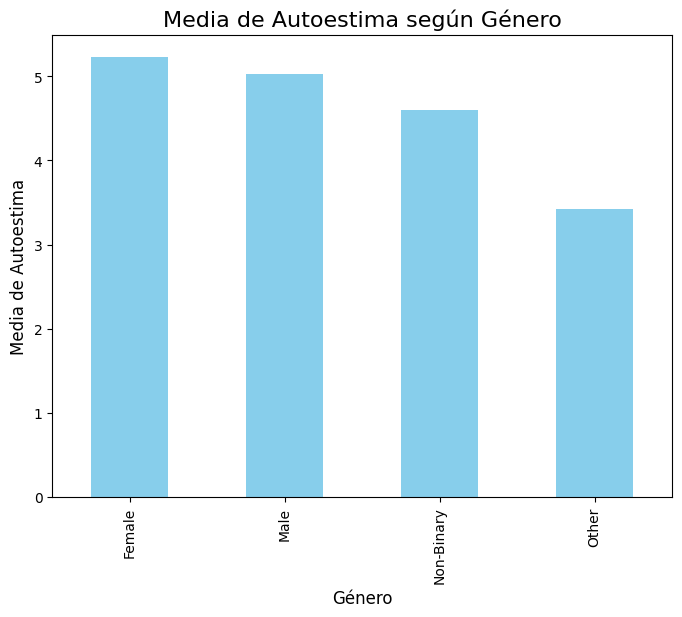

In [26]:
df_gender_self_esteem.plot(kind="bar", figsize=(8, 6), color='skyblue', legend=False)
plt.title("Media de Autoestima según Género", fontsize=16)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Media de Autoestima", fontsize=12)
plt.show()

1. ¿Hay diferencias notables entre los géneros en cuanto a autoestima?

No se parecia una diferencia notable entre los generos masculino y feminino, pero se notan diferencias más notables entre masculino y no-binario y con mayor notoriedad entre masculino y la clasifiación "otro"

2. ¿Qué factores del dataset podrían explicar estas diferencias?

In [27]:

df_factores_salud_mental[
    ["Gender", "Social_Support_Score", "Depression_Score", "Stress_Level"]
].groupby(
    "Gender"
).agg(
    ["mean", "median", "std"]
)

Social_Support_Score                  Depression_Score          
                           mean median       std             mean median   
Gender                                                                     
Female                 4.985940    5.0  2.655677        10.490334   11.0  \
Male                   5.113462    5.0  2.662197        10.771154   11.0   
Non-Binary             5.500000    6.0  2.553913        11.111111   12.0   
Other                  3.571429    3.0  2.292846        11.380952   13.0   

                     Stress_Level                   
                 std         mean median       std  
Gender                                              
Female      5.672114     4.927944    5.0  2.552976  
Male        5.582412     5.048077    5.0  2.548111  
Non-Binary  5.434894     5.122222    5.0  2.378876  
Other       6.763699     5.285714    6.0  2.667262

- Las personas podrían sentirse más apoyadas emocionalmente por sus redes de apoyo, lo que les ayuda a tener una autoestima más alta.
- Si las personas tienen mayores niveles de depresión, esto podría estar afectando su autoestima.
- Las personas con niveles de estrés más bajos podrían tener una autoestima más alta.